# Hotel Booking Cancellation Prediction
## Exploratory Data Analysis

### **Imports**

In [41]:
# importing necessary libraries
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.style as style
style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 6)

import seaborn as sns
sns.set_theme(style="whitegrid")

from scipy import stats

### **Loading Data**

In [42]:
# mounting the drive
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
# loading the cleaned dataset
working_dir = "/content/drive/MyDrive/hotel-booking-cancellation-prediction/data/"
hotels = pd.read_csv(working_dir + "interim/hotels_cleaned.csv")

In [44]:
hotels.sample(5).T

17959              32991  \
hotel                                Resort Hotel       Resort Hotel   
is_canceled                                     0                  0   
lead_time                                       0                  9   
arrival_date_year                            2015               2017   
arrival_date_month                        October           February   
arrival_date_week_number                       44                  6   
arrival_date_day_of_month                      27                  8   
stays_in_weekend_nights                         0                  0   
stays_in_week_nights                            1                  4   
adults                                          1                  2   
children                                      0.0                0.0   
babies                                          0                  0   
meal                                    BB                 BB          
country                                       PRT                ESP   
market_segment                             Direct          Online TA   
distribution_channel                       Direct              TA/TO   
is_repeated_guest                               0                  0   
previous_cancellations                          0                  0   
previous_bookings_not_canceled                  0                  0   
reserved_room_type               A                  A                  
assigned_room_type               D                  A                  
booking_changes                                 0                  0   
deposit_type                      No Deposit         No Deposit        
agent                                       Other                240   
company                                no_company         no_company   
days_in_waiting_list                            0                  0   
customer_type                           Transient          Transient   
adr                                          48.0               55.0   
required_car_parking_spaces                     0                  1   
total_of_special_requests                       0                  1   
reservation_status                      Check-Out          Check-Out   
reservation_status_date                2015-10-28         2017-02-12   

                                           83520              84954  \
hotel                                 City Hotel         City Hotel   
is_canceled                                    0                  0   
lead_time                                     31                 30   
arrival_date_year                           2016               2016   
arrival_date_month                      February              March   
arrival_date_week_number                       6                 10   
arrival_date_day_of_month                      4                  4   
stays_in_weekend_nights                        0                  0   
stays_in_week_nights                           2                  2   
adults                                         2                  2   
children                                     0.0                0.0   
babies                                         0                  0   
meal                                   BB                 BB          
country                                      PRT                PRT   
market_segment                         Corporate          Online TA   
distribution_channel                   Corporate              TA/TO   
is_repeated_guest                              0                  0   
previous_cancellations                         0                  0   
previous_bookings_not_canceled                 0                  0   
reserved_room_type              A                  A                  
assigned_room_type              A                  A                  
booking_changes                                0                  2   
deposit_type                     N

In [45]:
# inspect categorical columns
hotels.describe(exclude=[np.number]).T

count unique                top    freq
hotel                    119389      2         City Hotel   79329
arrival_date_month       119389     12             August   13877
meal                     119389      5          BB          92309
country                  119389    178                PRT   48589
market_segment           119389      8          Online TA   56477
distribution_channel     119389      5              TA/TO   97869
reserved_room_type       119389     10   A                  85993
assigned_room_type       119389     12   A                  74052
deposit_type             119389      3    No Deposit       104641
agent                    119389      9              Other   36636
company                  119389      4         no_company  112592
customer_type            119389      4          Transient   89612
reservation_status       119389      3          Check-Out   75166
reservation_status_date  119389    926         2015-10-21    1461

In [46]:
# inspect numerical columns
hotels.describe(include=[np.number]).T

count         mean         std      min  \
is_canceled                     119389.0     0.370411    0.482917     0.00   
lead_time                       119389.0   104.011994  106.863358     0.00   
arrival_date_year               119389.0  2016.156555    0.707479  2015.00   
arrival_date_week_number        119389.0    27.165292   13.605134     1.00   
arrival_date_day_of_month       119389.0    15.798164    8.780826     1.00   
stays_in_weekend_nights         119389.0     0.927606    0.998614     0.00   
stays_in_week_nights            119389.0     2.500314    1.908289     0.00   
adults                          119389.0     1.856402    0.579263     0.00   
children                        119389.0     0.103887    0.398557     0.00   
babies                          119389.0     0.007949    0.097437     0.00   
is_repeated_guest               119389.0     0.031912    0.175768     0.00   
previous_cancellations          119389.0     0.087119    0.844340     0.00   
previous_bookings_not_canceled  119389.0     0.137098    1.497443     0.00   
booking_changes                 119389.0     0.221118    0.652304     0.00   
days_in_waiting_list            119389.0     2.321169   17.594793     0.00   
adr                             119389.0   101.786744   48.153554    -6.38   
required_car_parking_spaces     119389.0     0.062518    0.245292     0.00   
total_of_special_requests       119389.0     0.571368    0.792800     0.00   

                                    25%      50%     75%     max  
is_canceled                        0.00     0.00     1.0     1.0  
lead_time                         18.00    69.00   160.0   737.0  
arrival_date_year               2016.00  2016.00  2017.0  2017.0  
arrival_date_week_number          16.00    28.00    38.0    53.0  
arrival_date_day_of_month          8.00    16.00    23.0    31.0  
stays_in_weekend_nights            0.00     1.00     2.0    19.0  
stays_in_week_nights               1.00     2.00     3.0    50.0  
adults                             2.00     2.00     2.0    55.0  
children                           0.00     0.00     0.0    10.0  
babies                             0.00     0.00     0.0    10.0  
is_repeated_guest                  0.00     0.00     0.0     1.0  
previous_cancellations             0.00     0.00     0.0    26.0  
previous_bookings_not_canceled     0.00     0.00     0.0    72.0  
booking_changes                    0.00     0.00     0.0    21.0  
days_in_waiting_list               0.00     0.00     0.0   391.0  
adr                               69.29    94.56   126.0   510.0  
required_car_parking_spaces        0.00     0.00     0.0     8.0  
total_of_special_requests          0.00     0.00     1.0     5.0

We performed some exploration in the previous part of our project, but there are still some questions that we will explore in this notebook:

1. Does origin of the booking matter when it comes to Booking Cancelations? i.e., are there significant differences in bookings, specifically in booking cancelations, coming from the Resort Hotel or from the City Hotel?
2. With data being spread over 3 years, are there any trends that can be identified correlated to the year or the arrival?
3. Will heatmap of our features reveal any unexpected correlations?
4. In the previous notebook, we identified that almost all customers(99.36%) with a "No Refund"(full pay of the stay) canceled their booking, which seemed very surprising. Are there other features that could explain this behavior?

### **Hypothesis testing**

Are the two hotels records similar?

To determine if records from the two hotels(Resort Hotel and City Hotel) are significantly different, we will conduct a hypothesis test on their cancellation distributions. This will help us decide whether there is a need to consider the hotel origin as a relevant feature or to remove the 'hotel' feature from our analysis.

- H_null: the observed difference in the mean cancelations per day of Resort Hotel and City Hotel is due to chance (and thus not due to the hotel).

- H_alt: the observed difference in the mean cancelations per day of Resort Hotel and City Hotel is not due to chance (and is actually due to the hotel).

- Significance level of 0.01 - Confidence level of 99%.

In [47]:
# transforming our data into a dataset containing percentage of bookings canceled per day for each of the two hotels
daily_bookin = hotels.groupby(by = ['hotel', 'arrival_date_year', 'arrival_date_month',
                                    'arrival_date_day_of_month' ])['is_canceled'].count()

daily_cancel = hotels.groupby(by = ['hotel', 'arrival_date_year', 'arrival_date_month',
                                    'arrival_date_day_of_month' ])['is_canceled'].sum()

daily_perc = (daily_cancel/daily_bookin*100).astype(int)
daily_perc

hotel         arrival_date_year  arrival_date_month  arrival_date_day_of_month
City Hotel    2015               August              1                            54
                                                     2                             0
                                                     3                            81
                                                     4                            25
                                                     5                            45
                                                                                  ..
Resort Hotel  2017               May                 27                           57
                                                     28                           31
                                                     29                           14
                                                     30                           43
                                                     31                

In [48]:
daily_perc.describe()

count    1586.000000
mean       31.121059
std        17.024027
min         0.000000
25%        19.000000
50%        30.000000
75%        41.000000
max       100.000000
Name: is_canceled, dtype: float64

In [49]:
daily_perc.groupby(by = 'hotel').describe()

count       mean        std  min   25%   50%   75%    max
hotel                                                                  
City Hotel    793.0  37.450189  17.750739  0.0  25.0  36.0  47.0  100.0
Resort Hotel  793.0  24.791929  13.590264  0.0  15.0  24.0  33.0   82.0

In [50]:
test_data = daily_perc.reset_index()
fig, ax = plt.subplots(figsize=(6,5))
sns.boxplot(x = 'hotel', y = 'is_canceled', data = test_data)
plt.title('Boxplot of cancelation percentages')
plt.ylabel('Daily cancelation percentages')

Text(0, 0.5, 'Daily cancelation percentages')

Average percentage of daily cancellations for the 2 hotels differs considerably, with the City Hotel having 37.45% while the Resort Hotel has a lower rate of 24.79%.

#### Are these normal distributions?

In [51]:
# using stats.normaltest() to check whether the Resort Hotel data is normally distributed
resort = stats.normaltest(daily_perc['Resort Hotel'])
resort

NormaltestResult(statistic=31.00150109538724, pvalue=1.8539993253685236e-07)

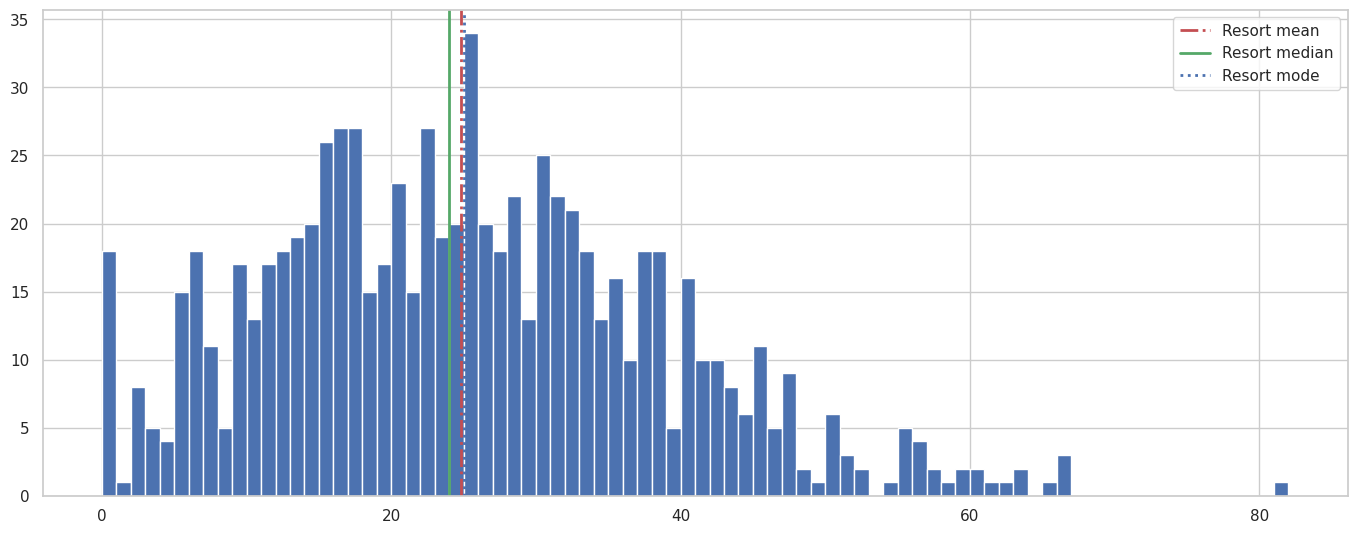

In [52]:
daily_perc['Resort Hotel'].hist(bins = 82)
plt.axvline(x=daily_perc['Resort Hotel'].mean(), color = 'r', linewidth = 2, label = 'Resort mean', linestyle = '-.')
plt.axvline(x=daily_perc['Resort Hotel'].median(), color = 'g', linewidth = 2, label = 'Resort median')
plt.axvline(x=daily_perc['Resort Hotel'].mode().iloc[0], color = 'b', linewidth = 2, label = 'Resort mode', linestyle = ':')
plt.legend()

This distribution is right skewed, having a tail on right side. Although the mean, median and mode have small differences, the low pvalue indicates a significant deviation from a normal distribution.

In [53]:
# using stats.normaltest() to check whether City Hotel data is normally distributed
city = stats.normaltest(daily_perc['City Hotel'])
city

NormaltestResult(statistic=77.32799228653873, pvalue=1.6159943076993227e-17)

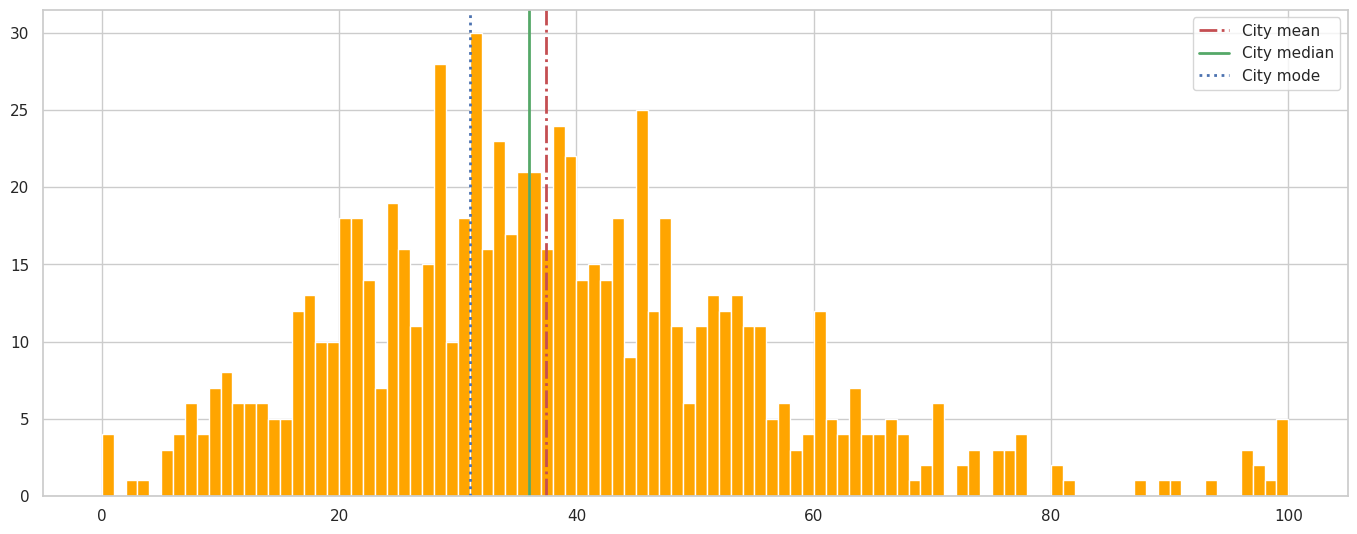

In [54]:
daily_perc['City Hotel'].hist(bins = 100, color = 'orange')
plt.axvline(x=daily_perc['City Hotel'].mean(), color = 'r', linewidth = 2, label = 'City mean', linestyle = '-.')
plt.axvline(x=daily_perc['City Hotel'].median(), color = 'g', linewidth = 2, label = 'City median')
plt.axvline(x=daily_perc['City Hotel'].mode().iloc[0], color = 'b', linewidth = 2, label = 'City mode', linestyle = ':')
plt.legend()

This distribution is also right-skewed, with notable differences between the mean, mode, and median. The very low p-value allows us to confidently conclude that this distribution is not normal.

Text(0.5, 1.0, 'Distribution of the cancelation percentages with means')

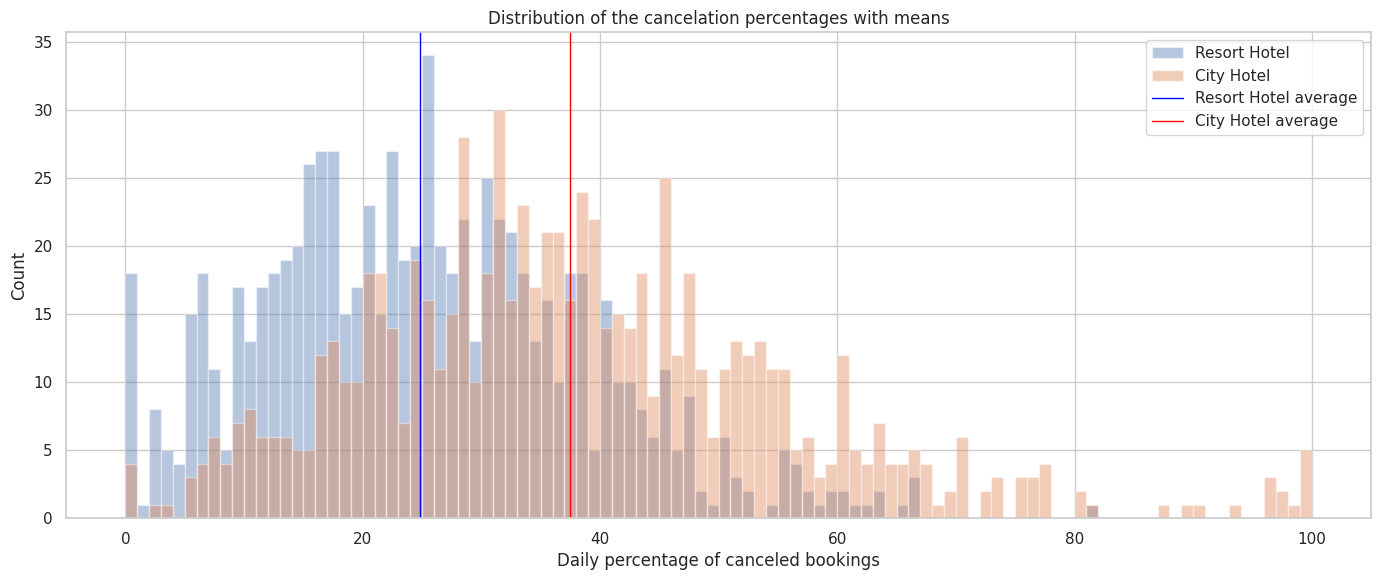

In [55]:
# ploting 2 distributions
daily_perc['Resort Hotel'].hist(bins = 82, alpha = 0.4, label = 'Resort Hotel')
daily_perc['City Hotel'].hist(bins = 100, alpha = 0.4, label = 'City Hotel')

# ploting means of the 2 distributions
plt.axvline(x=daily_perc['Resort Hotel'].mean(), color = 'blue', linewidth = 1, label = 'Resort Hotel average')
plt.axvline(x=daily_perc['City Hotel'].mean(), color = 'red', linewidth = 1, label = 'City Hotel average')

plt.legend()
plt.xlabel('Daily percentage of canceled bookings')
plt.ylabel('Count')
plt.title('Distribution of the cancelation percentages with means')

Difference is more visible now, with the Resort Hotel having more days with fewer cancelations percentages than City Hotel.

#### Permutation test
Since data is not normally distributed, we will use a non-parametric test.

In [56]:
# new column to store permutaion of is_canceled values.
test_data['Permutation'] = np.random.permutation(test_data.is_canceled)

# checking new distribution after permutations
test_data.groupby('hotel')['Permutation'].describe()

count       mean        std  min   25%   50%   75%    max
hotel                                                                  
City Hotel    793.0  30.769231  17.208935  0.0  18.0  30.0  41.0  100.0
Resort Hotel  793.0  31.472888  16.840595  0.0  20.0  30.0  41.0  100.0

In [57]:
# calculating diff in mean between 2 distributions before and after permutations
observed_diff = daily_perc['City Hotel'].mean() - daily_perc['Resort Hotel'].mean()

perm_diff = test_data.groupby('hotel')['Permutation'].describe().loc['City Hotel', 'mean'] \
        - test_data.groupby('hotel')['Permutation'].describe().loc['Resort Hotel', 'mean']

print('Real difference is {} and difference after permutation of values is {}' \
      .format(round(observed_diff, 2), round(perm_diff, 2)))

Real difference is 12.66 and difference after permutation of values is -0.7


Difference in means for Permutation -0.7 looks quite different to observed difference of 12.66. Its looking like observed difference is significant, and than the Null Hypothesis is false; the hotel does have an impact on cancelation rate.

- To be sure this is not by chance, creating 1000 permutations, calculating mean of the permutation of the cancelation percentages and difference between these for each one.


In [58]:
difference = np.empty(1000)

- making permutation of is_canceled
- calculating difference in mean between the 2 hotels

In [59]:
for i in range(1000):
    test_data['Permutation_x'] = np.random.permutation(test_data.is_canceled)
    difference[i] = test_data.groupby('hotel')['Permutation_x'].describe().loc['City Hotel', 'mean'] \
        - test_data.groupby('hotel')['Permutation_x'].describe().loc['Resort Hotel', 'mean']

Plotting the distribution of mean and observed difference after 1000 permutations

Text(0.5, 1.0, 'Mean difference distribution for 1000 permutations compared to Observed difference')

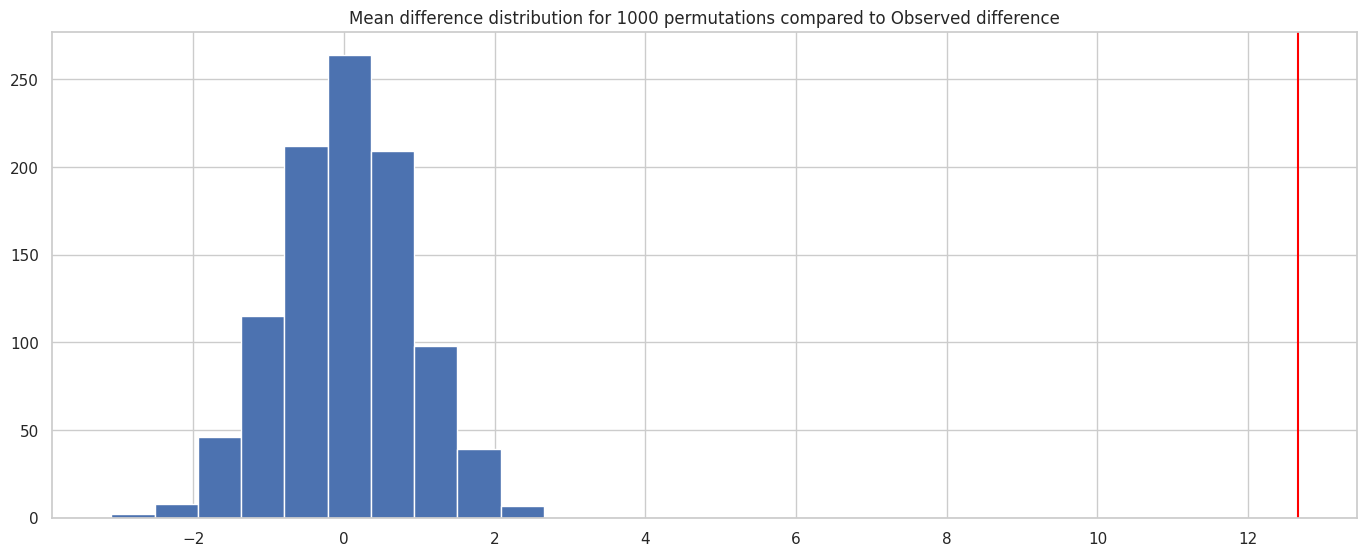

In [60]:
plt.hist(difference)
plt.axvline(x=observed_diff, color = 'red')
plt.title('Mean difference distribution for 1000 permutations compared to Observed difference')

In [61]:
# calculating p_value
p_value = np.sum(difference >= observed_diff) / len(difference)
print('Test P_value = ', p_value)

Test P_value =  0.0


So the p-value of our observed data is 0. Actually, zero differences are at least as extreme as our observed difference!

It doesn't matter which significance level we pick; our observed data is statistically significant, and we reject the Null Hypothesis.

As somewhat expected, we conclude that hotels have an influence on the is_canceled target feature. So we will keep keep this for our predition modeling.

### **Feature analysis**

<ipython-input-62-1e6bb7a4c9a7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(round(hotels.corr(), 2), center = 0, cmap="coolwarm", annot = True, annot_kws={'size': 10})


<Axes: >

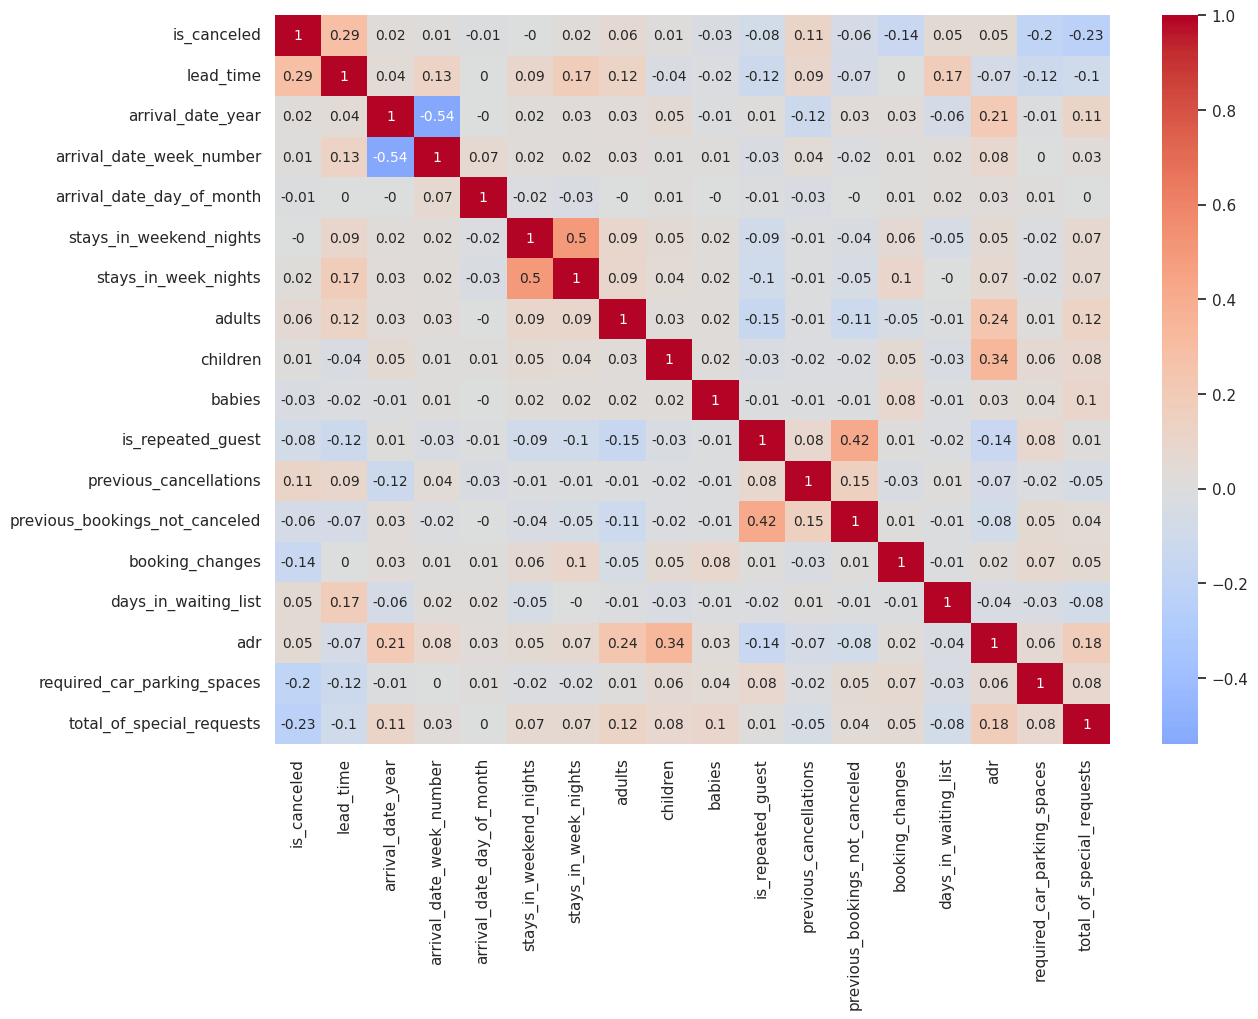

In [62]:
# heatmap
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(round(hotels.corr(), 2), center = 0, cmap="coolwarm", annot = True, annot_kws={'size': 10})

Some notable correlations, most are expected like:
- arrival_date_year and arrival_date_week_number, negativelly correlated because 2015 had the ending weeks, 2016 has all of them and 2017 has only the first weeks.
- stays_in_weekend_nights is highly correlated with stays_in_week_nights. Expected because for longer stays, as the number of days increase both these features will increase accordingly
- other features are less correlated but can be explored like:
  - is_canceled positively correlated with lead_time and negatively correlated with required_car_parking_spaces and total_of_special_requests
  - adr positively correlated with arrival_date_year, adults and children

In [64]:
g = sns.catplot(x="hotel", y="lead_time", data=hotels, kind="box", hue = "is_canceled", showfliers = False)
plt.show()

A correlation can be seen between cancelations and lead_time, regardless of the hotel.

Text(0.5, 1.2, 'Canceled bookings - ADR vs lead_time')

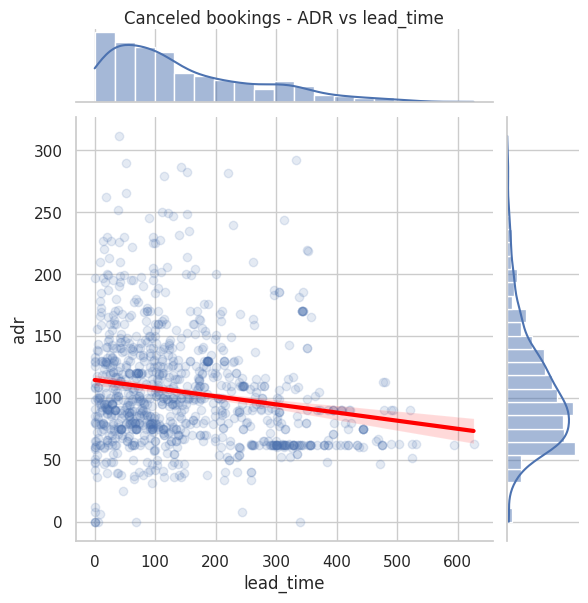

In [65]:
# exploring correlation between ADR and lead_time and how it changes canceled and confirmed bookings
g_b = sns.jointplot(y='adr', x='lead_time', data=hotels[hotels.is_canceled == 0].sample(1000), kind = 'reg', scatter_kws={'alpha':0.15},
                    line_kws={'color': 'green', 'linewidth' : 3})
plt.title('Comfirmed bookings - ADR vs lead_time', y = 1.2)

g_c = sns.jointplot(y='adr', x='lead_time', data=hotels[hotels.is_canceled == 1].sample(1000), kind = 'reg', scatter_kws={'alpha':0.15},
                    line_kws={'color': 'red', 'linewidth' : 3})
plt.title('Canceled bookings - ADR vs lead_time', y = 1.2)

Slight positive correlation for the confirmed bookings and a negative correlation for those who canceled.

<ipython-input-66-d8e7bafc82f0>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  plots = sns.barplot(y='adr', x='children', data=hotels[hotels.adr > 0], hue = 'is_canceled', ci = None)


Text(0.5, 1.0, 'Comfirmed bookings - ADR for bookings with children')

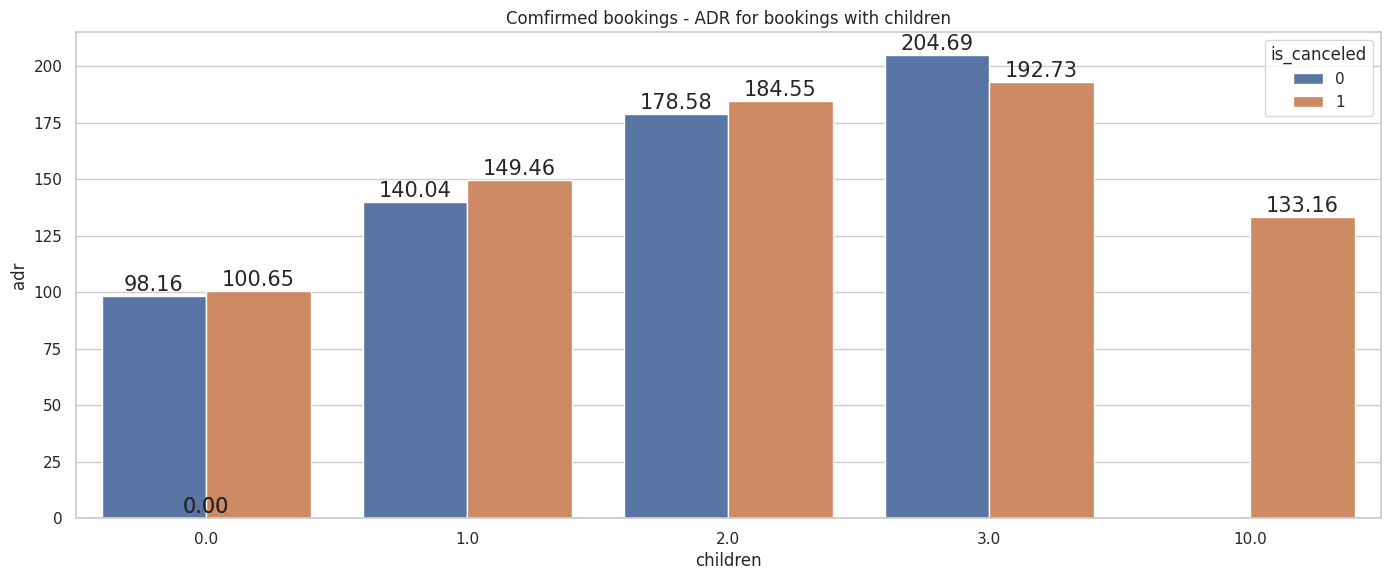

In [66]:
# exploring correlation between ADR and children, adults
plots = sns.barplot(y='adr', x='children', data=hotels[hotels.adr > 0], hue = 'is_canceled', ci = None)
for bar in plots.patches:
     plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.title('Comfirmed bookings - ADR for bookings with children')

In [67]:
plots = sns.barplot(y='adr', x='adults', data=hotels[hotels.adr > 0], hue = 'is_canceled', ci = None)
for bar in plots.patches:
     plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.title('Comfirmed bookings - ADR for bookings with adults')

<ipython-input-67-73073c28c410>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  plots = sns.barplot(y='adr', x='adults', data=hotels[hotels.adr > 0], hue = 'is_canceled', ci = None)


Text(0.5, 1.0, 'Comfirmed bookings - ADR for bookings with adults')

<ipython-input-68-d1cfea897521>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  c = color, colormap=matplotlib.cm.get_cmap('Spectral'),


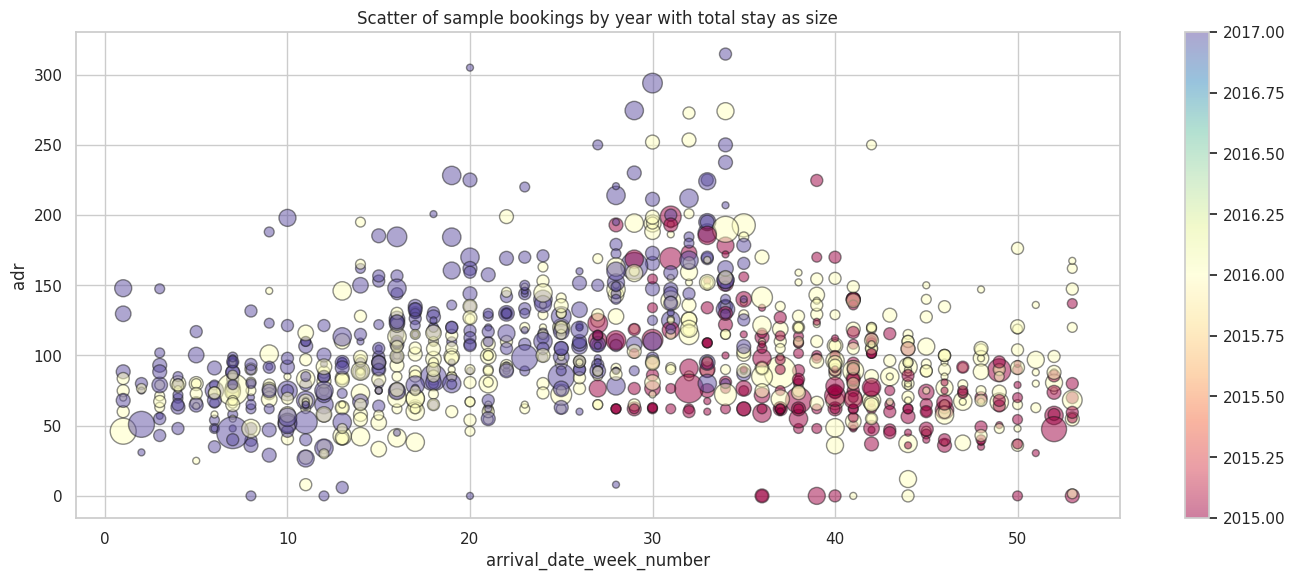

In [68]:
subset = hotels.sample(1000, random_state = 42)
area = (subset.stays_in_week_nights+subset.stays_in_weekend_nights)*25
color = subset.arrival_date_year

subset.plot.scatter(x ='arrival_date_week_number', y ='adr' ,
                     c = color, colormap=matplotlib.cm.get_cmap('Spectral'),
                     s = area, edgecolors = 'k',
                     sharex=False, figsize = (15,6), alpha = 0.5)
plt.title('Scatter of sample bookings by year with total stay as size')
plt.show()

<ipython-input-69-681d5d27b377>:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  c = color, colormap=matplotlib.cm.get_cmap('Spectral'),


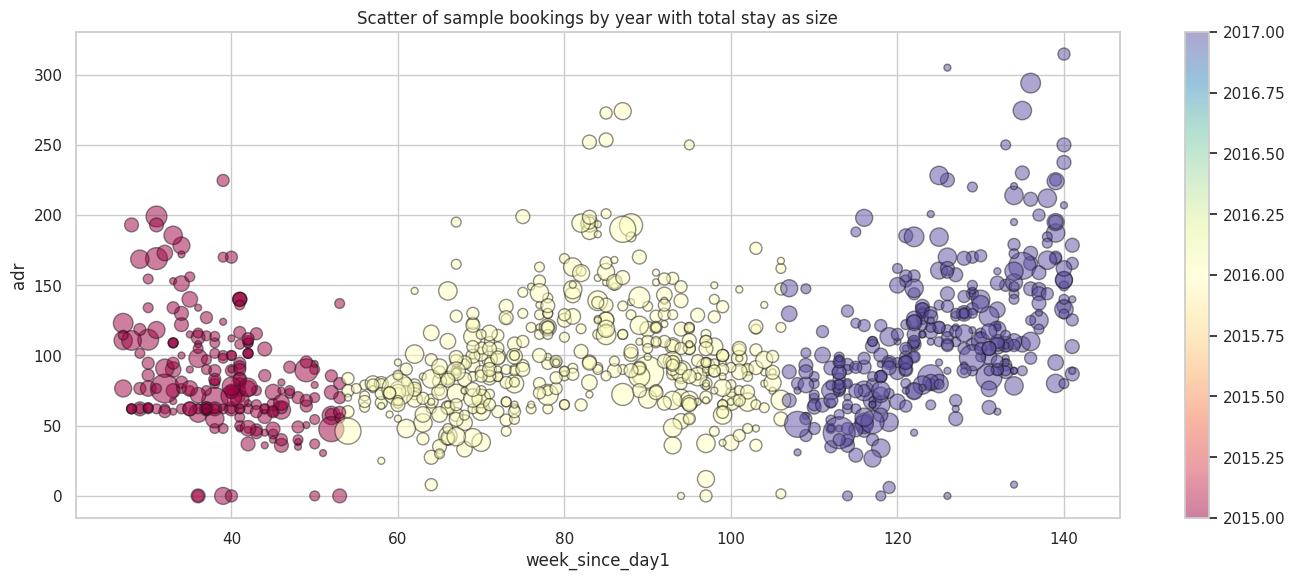

In [69]:
# Let's see the same graph spread on weeks from start until the end
for i, row in subset.iterrows():
    if subset.loc[i,'arrival_date_year'] == 2015:
        subset.loc[i, 'week_since_day1'] = subset.loc[i,'arrival_date_week_number']
    elif subset.loc[i,'arrival_date_year'] == 2016:
        subset.loc[i, 'week_since_day1'] = subset.loc[i,'arrival_date_week_number'] + 53
    else:
        subset.loc[i, 'week_since_day1'] = subset.loc[i,'arrival_date_week_number'] + 106
area = (subset.stays_in_week_nights+subset.stays_in_weekend_nights)*25
color = subset.arrival_date_year

subset.plot.scatter(x ='week_since_day1', y ='adr' ,
                     c = color, colormap=matplotlib.cm.get_cmap('Spectral'),
                     s = area, edgecolors = 'k',
                     sharex=False, figsize = (15,6), alpha = 0.5)
plt.title('Scatter of sample bookings by year with total stay as size')
plt.show()

In [70]:
hotels.deposit_type.value_counts()

No Deposit         104641
Non Refund          14586
Refundable            162
Name: deposit_type, dtype: int64

In [71]:
hotels.deposit_type.unique()

array(['No Deposit     ', 'Refundable     ', 'Non Refund     '],
      dtype=object)

In [72]:
hotels.deposit_type = hotels.deposit_type.str.rstrip()
hotels.deposit_type.unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

In [73]:
hotels[hotels.deposit_type == 'Non Refund'].describe(exclude=[np.number]).T

count unique                top   freq
hotel                    14586      2         City Hotel  12867
arrival_date_month       14586     12          September   1953
meal                     14586      5          BB         12432
country                  14586     13                PRT  14175
market_segment           14586      5             Groups   9172
distribution_channel     14586      3              TA/TO  13650
reserved_room_type       14586      8   A                 14259
assigned_room_type       14586      9   A                 14175
deposit_type             14586      1         Non Refund  14586
agent                    14586      6              Other   7789
company                  14586      4         no_company  14080
customer_type            14586      3          Transient  12908
reservation_status       14586      3           Canceled  14459
reservation_status_date  14586    289         2015-10-21   1357

In [74]:
hotels[hotels.deposit_type == 'Non Refund'].describe(include=[np.number]).T

count         mean         std     min  \
is_canceled                     14586.0     0.993624    0.079597     0.0   
lead_time                       14586.0   212.921089  133.320833     0.0   
arrival_date_year               14586.0  2016.031469    0.730292  2015.0   
arrival_date_week_number        14586.0    27.449609   13.331638     1.0   
arrival_date_day_of_month       14586.0    15.594817    8.699506     1.0   
stays_in_weekend_nights         14586.0     0.621761    0.819553     0.0   
stays_in_week_nights            14586.0     2.091183    1.152325     0.0   
adults                          14586.0     1.811394    0.394003     1.0   
children                        14586.0     0.000617    0.032064     0.0   
babies                          14586.0     0.000000    0.000000     0.0   
is_repeated_guest               14586.0     0.004388    0.066097     0.0   
previous_cancellations          14586.0     0.411490    1.992551     0.0   
previous_bookings_not_canceled  14586.0     0.010627    0.443391     0.0   
booking_changes                 14586.0     0.012409    0.125237     0.0   
days_in_waiting_list            14586.0     7.992801   29.497448     0.0   
adr                             14586.0    89.599967   30.286250     6.0   
required_car_parking_spaces     14586.0     0.000069    0.008280     0.0   
total_of_special_requests       14586.0     0.001783    0.045318     0.0   

                                   25%     50%     75%     max  
is_canceled                        1.0     1.0     1.0     1.0  
lead_time                        103.0   183.0   304.0   629.0  
arrival_date_year               2015.0  2016.0  2017.0  2017.0  
arrival_date_week_number          17.0    25.0    39.0    53.0  
arrival_date_day_of_month          8.0    16.0    23.0    31.0  
stays_in_weekend_nights            0.0     0.0     1.0     7.0  
stays_in_week_nights               1.0     2.0     3.0    16.0  
adults                             2.0     2.0     2.0     3.0  
children                           0.0     0.0     0.0     2.0  
babies                             0.0     0.0     0.0     0.0  
is_repeated_guest                  0.0     0.0     0.0     1.0  
previous_cancellations             0.0     0.0     0.0    26.0  
previous_bookings_not_canceled     0.0     0.0     0.0    29.0  
booking_changes                    0.0     0.0     0.0     4.0  
days_in_waiting_list               0.0     0.0     0.0   391.0  
adr                               62.8    86.0   110.0   330.0  
required_car_parking_spaces        0.0     0.0     0.0     1.0  
total_of_special_requests          0.0     0.0     0.0     2.0

In [75]:
subset = hotels[hotels.deposit_type == 'Non Refund']
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(round(subset.corr(), 2), center = 0, cmap="coolwarm", annot = True, annot_kws={'size': 11})
plt.title('Heatmap of subset containing Non-refundable bookings')

<ipython-input-75-b6b2471fbdf4>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(round(subset.corr(), 2), center = 0, cmap="coolwarm", annot = True, annot_kws={'size': 11})


Text(0.5, 1.0, 'Heatmap of subset containing Non-refundable bookings')

<ipython-input-76-4e9e549285e9>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(round(subset.corr() - hotels.corr(), 2), center = 0, cmap="coolwarm", annot = True, annot_kws={'size': 11})


Text(0.5, 1.0, 'Difference between correlation of non-refundable Bookings and all Bookings')

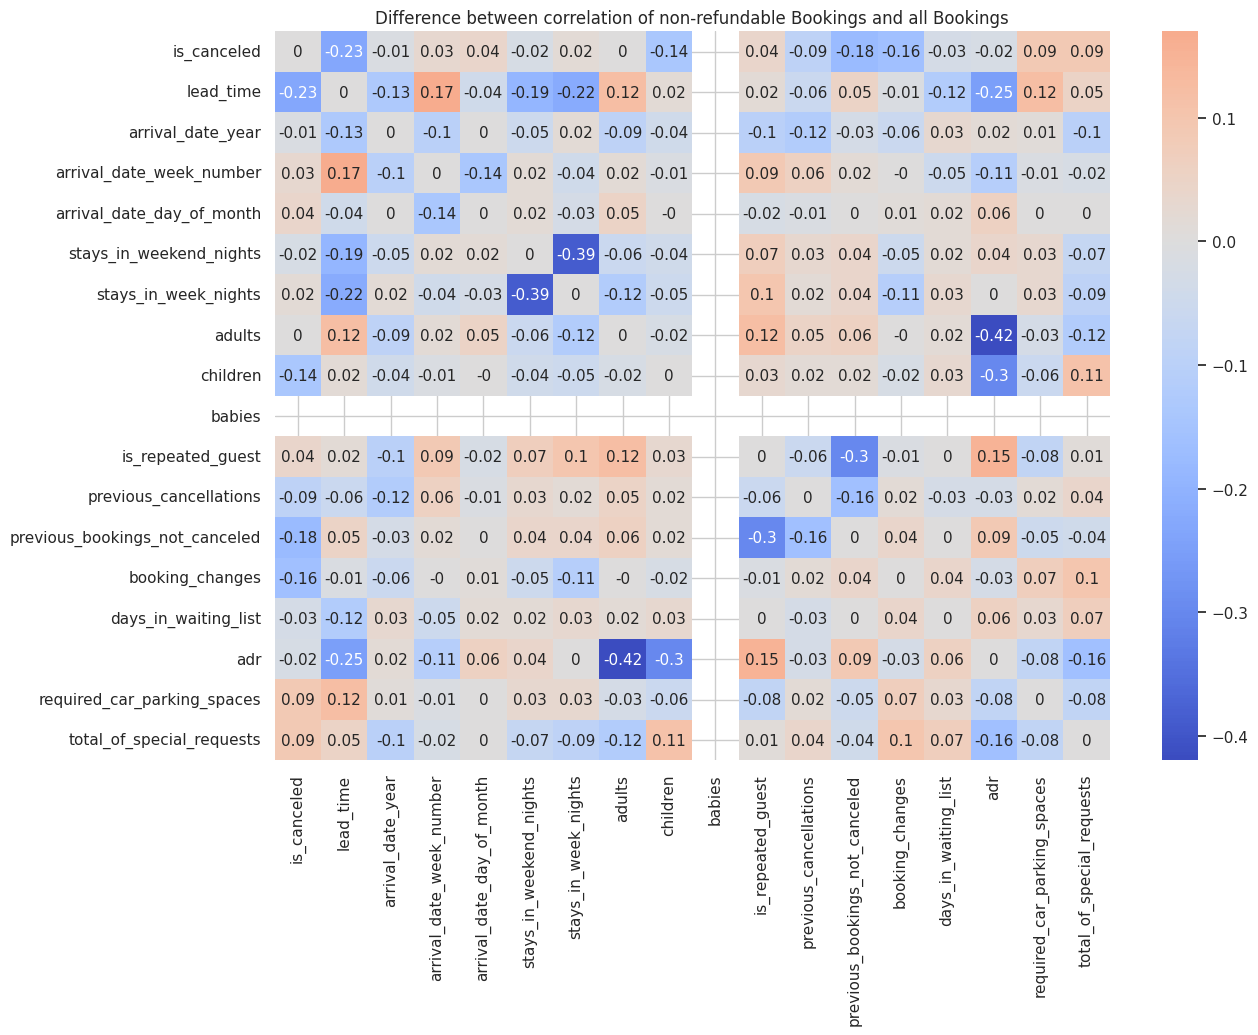

In [76]:
subset = hotels[hotels.deposit_type == 'Non Refund']
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(round(subset.corr() - hotels.corr(), 2), center = 0, cmap="coolwarm", annot = True, annot_kws={'size': 11})
plt.title('Difference between correlation of non-refundable Bookings and all Bookings')

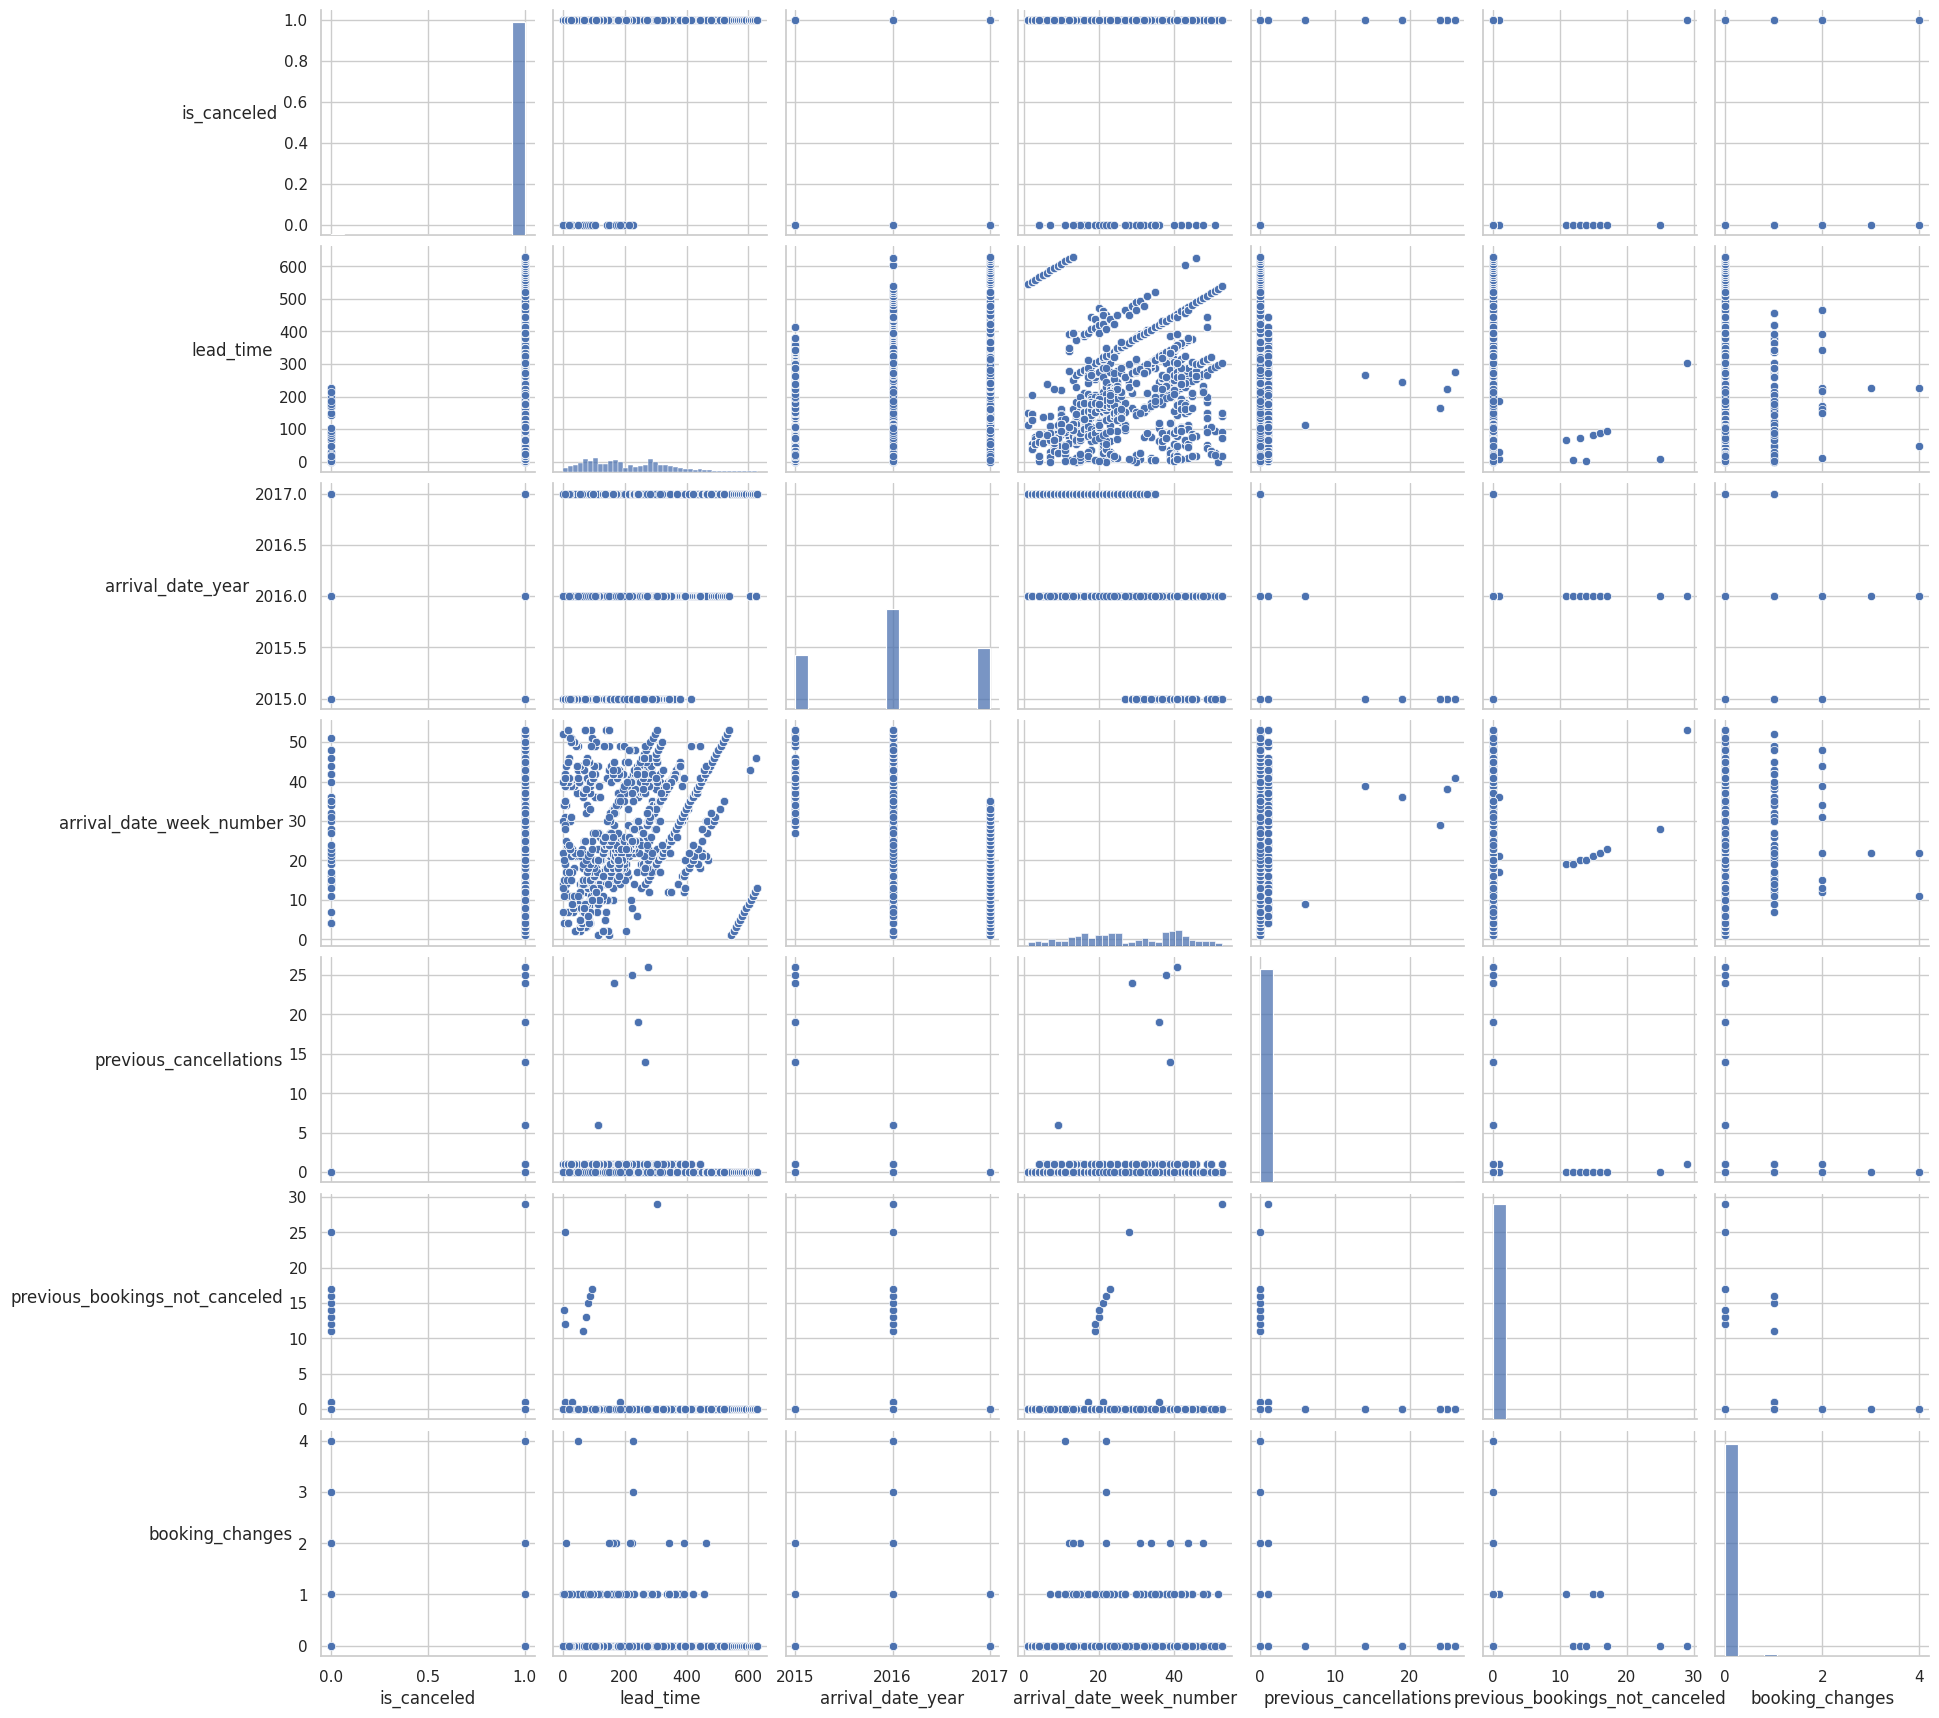

In [77]:
g = sns.pairplot(hotels[hotels.deposit_type == 'Non Refund'].loc[:, ['is_canceled', 'lead_time', 'arrival_date_year',
                                                             'arrival_date_week_number', 'previous_cancellations',
                                                             'previous_bookings_not_canceled', 'booking_changes']])
for axes in g.axes.flat:
    axes.set_ylabel(axes.get_ylabel(), rotation=0, horizontalalignment='right')
    axes.set_xlabel(axes.get_xlabel(), rotation=0)
plt.show()

In [78]:
sns.relplot(data = hotels, y = 'lead_time', x = 'arrival_date_week_number',
            kind = 'scatter', hue = 'is_canceled', col = 'deposit_type', row = 'hotel')

In [79]:
sns.relplot(data = hotels, x = 'arrival_date_week_number', y = 'lead_time',
            kind = 'scatter', col = 'deposit_type', hue = 'is_canceled', row = 'customer_type')

### **Conclusions**
EDA unveiled distinct cancellation patterns across hotels and features. The extremely high non-refundable cancellation rate raises data quality or policy concerns. Moving forward, customer segmentation via unsupervised learning will inform feature engineering and preprocessing for building a robust cancellation risk model.